In [1]:
import numpy as np
import random
import os
import torch
from torch.autograd import Variable
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


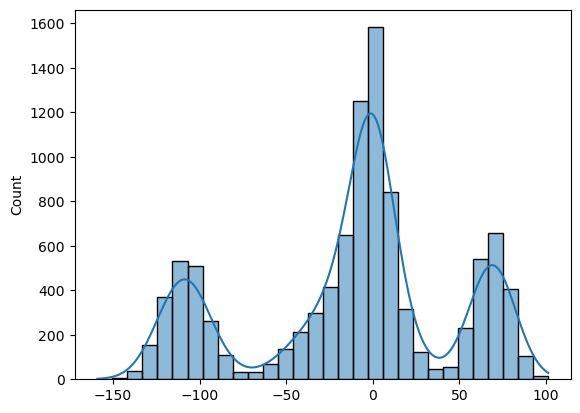

In [2]:
import numpy as np
import torch

# 生成多峰分布数据
data1 = np.random.multivariate_normal([3, 9], [[1, 0.5], [0.5, 1]], 2000)
data2 = np.random.multivariate_normal([-3, -9], [[1, 0.5], [0.5, 1]], 2000)
data3 = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 2000)
data4 = np.random.multivariate_normal([6, -6], [[1, 0.5], [0.5, 1]], 2000)
data5 = np.random.multivariate_normal([-6, 6], [[1, 0.5], [0.5, 1]], 2000)
data6 = np.vstack([data1, data2, data3, data4, data5])

coef1 = [5, 6]
coef2 = [25, -6]
coef3 = [3, 13]
coef4 = [4, 4]
coef5 = [14, -4]
noise = np.random.randn(10000)

# 生成多峰目标变量
data7_1 = data6[:2000, 0] * coef1[0] + data6[:2000, 1] * coef1[1] + noise[:2000]
data7_2 = data6[2000:4000, 0] * coef2[0] + data6[2000:4000, 1] * coef2[1] + noise[2000:4000]
data7_3 = data6[4000:6000, 0] * coef3[0] + data6[4000:6000, 1] * coef3[1] + noise[4000:6000]
data7_4 = data6[6000:8000, 0] * coef4[0] + data6[6000:8000, 1] * coef4[1] + noise[6000:8000]
data7_5 = data6[8000:, 0] * coef5[0] + data6[8000:, 1] * coef5[1] + noise[8000:]
data7 = np.concatenate([data7_1, data7_2, data7_3, data7_4, data7_5])

# 合并数据
data = np.concatenate([data6, data7.reshape(-1, 1)], axis=1)
dataset = torch.tensor(data).float()
sns.histplot(data[:,-1], kde=True, bins=30)
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
X_train_5, X_temp_5 = train_test_split(data, test_size=0.2, random_state=42)
X_val_5, X_test_5 = train_test_split(X_temp_5, test_size=0.5, random_state=42)

X_train_5 = pd.DataFrame(X_train_5)
X_test_5 = pd.DataFrame(X_test_5)
X_val_5 = pd.DataFrame(X_val_5)
condim = X_train_5.shape[1]-1
train_data = X_train_5
val_data = X_val_5
test_data = X_test_5
X_train_5 = np.array(train_data, dtype=np.float32)
X_val_5 = np.array(val_data, dtype=np.float32)
X_test_5 = np.array(test_data, dtype=np.float32)
resultdata = pd.DataFrame()
# 设置 'Weekly_Sales' 列的值为 vaedata 中的 'Weekly_Sales' 列的值
resultdata['test'] = X_test_5[:,-1]
scatrain5 = StandardScaler()
sca_X_train_5 = scatrain5.fit_transform(X_train_5)
scaval5 = StandardScaler()
sca_X_val_5 = scaval5.fit_transform(X_val_5)
scay5 = StandardScaler()
sca_Y_train_5 = scay5.fit_transform(X_train_5[:,-1].reshape(-1,1))
scatest5 = StandardScaler()
sca_X_test_5 = scatest5.fit_transform(X_test_5)
sca_traindata_loader_5 = DataLoader(sca_X_train_5, batch_size=64, shuffle=True)
sca_valdata_loader_5 = DataLoader(sca_X_val_5, batch_size=64, shuffle=True)
total_iteration = 1000
current_iteration = 0
display_iteration = 200
sampling_number = 1000
only_final = True
batch_size =64
beta_1 = 1e-4
beta_T = 0.02
T = 50
device = torch.device('cuda')


In [3]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
X_train_5, X_temp_5 = train_test_split(data, test_size=0.2, random_state=42)
X_val_5, X_test_5 = train_test_split(X_temp_5, test_size=0.5, random_state=42)

X_train_5 = pd.DataFrame(X_train_5)
X_test_5 = pd.DataFrame(X_test_5)
X_val_5 = pd.DataFrame(X_val_5)
condim = X_train_5.shape[1]-1
train_data = X_train_5
val_data = X_val_5
test_data = X_test_5
X_train_5 = np.array(train_data, dtype=np.float32)
X_val_5 = np.array(val_data, dtype=np.float32)
X_test_5 = np.array(test_data, dtype=np.float32)
resultdata = pd.DataFrame()
# 设置 'Weekly_Sales' 列的值为 vaedata 中的 'Weekly_Sales' 列的值
resultdata['test'] = X_test_5[:,-1]
scatrain5 = StandardScaler()
sca_X_train_5 = scatrain5.fit_transform(X_train_5)
scaval5 = StandardScaler()
sca_X_val_5 = scaval5.fit_transform(X_val_5)
scay5 = StandardScaler()
sca_Y_train_5 = scay5.fit_transform(X_train_5[:,-1].reshape(-1,1))
scatest5 = StandardScaler()
sca_X_test_5 = scatest5.fit_transform(X_test_5)
sca_traindata_loader_5 = DataLoader(sca_X_train_5, batch_size=64, shuffle=True)
sca_valdata_loader_5 = DataLoader(sca_X_val_5, batch_size=64, shuffle=True)
total_iteration = 1000
current_iteration = 0
display_iteration = 200
sampling_number = 1000
only_final = True
batch_size =64
beta_1 = 1e-4
beta_T = 0.02
T = 50
device = torch.device('cuda')


In [5]:
from model.ddpm_regression import DDPM_regression
con_dim  = X_train_5.shape[1]-1
batch_size =64
beta_1 = 1e-4
beta_T = 0.02
T = 50
input_dim = 1
device = torch.device('cuda')
ddpm_regression = DDPM_regression(device, beta_1, beta_T, T, input_dim,con_dim,alpha = 0.1)
ddpm_regression.train(100,sca_traindata_loader_5,sca_valdata_loader_5)

epoch: 0, Train Loss: 0.0000, Val Loss: -0.7613
epoch: 0, find new best loss: Train Loss: -0.7613
----------
epoch: 1, find new best loss: Train Loss: -0.9751
----------
epoch: 2, find new best loss: Train Loss: -1.1665
----------
epoch: 3, find new best loss: Train Loss: -1.1810
----------
epoch: 4, find new best loss: Train Loss: -1.3677
----------
epoch: 7, find new best loss: Train Loss: -1.4791
----------
epoch: 9, find new best loss: Train Loss: -1.5744
----------
epoch: 11, find new best loss: Train Loss: -1.6392
----------
epoch: 13, find new best loss: Train Loss: -1.7180
----------
epoch: 18, find new best loss: Train Loss: -1.7467
----------
epoch: 20, Train Loss: 0.0000, Val Loss: -1.3985
epoch: 23, find new best loss: Train Loss: -1.7833
----------
epoch: 28, find new best loss: Train Loss: -1.8209
----------
epoch: 29, find new best loss: Train Loss: -1.9665
----------
epoch: 31, find new best loss: Train Loss: -2.0351
----------
epoch: 39, find new best loss: Train Loss:

In [4]:
from model.ddpm_regression import DDPM_regression
con_dim  = X_train_5.shape[1]-1
batch_size =64
beta_1 = 1e-4
beta_T = 0.02
T = 50
input_dim = 1
device = torch.device('cuda')
ddpm_regression = DDPM_regression(device, beta_1, beta_T, T, input_dim,con_dim,alpha = 0.1)
ddpm_regression.ddpm.load_state_dict(torch.load('ddpm_model.pth'))
ddpm_regression.gnet.load_state_dict(torch.load('gnet_model.pth'))

C:\Users\miaoz\AppData\Local\Temp\ipykernel_1284\2945930698.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ddpm_regression.ddpm.load_state_dict(torch.load('ddpm_model.

<All keys matched successfully>

c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


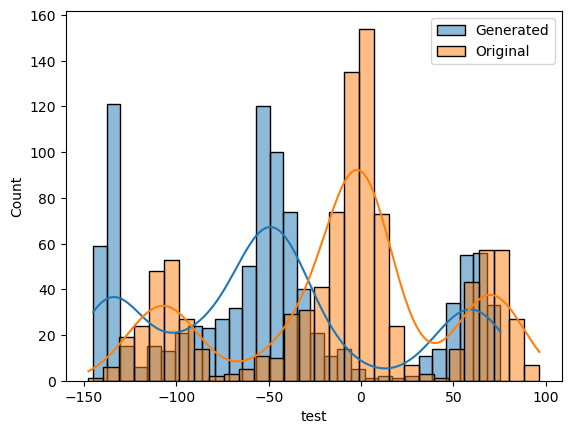

In [5]:
sca_X_test_5 = torch.tensor(sca_X_test_5).float().to(device)
sample = ddpm_regression.forward(sca_X_test_5[:,-1].reshape(-1,1),sca_X_test_5[:,:-1])

trandatacvae = scay5.inverse_transform(sample.cpu().detach().numpy())
sns.histplot(trandatacvae, kde=True, bins=30, label='Generated')
sns.histplot(resultdata['test'], kde=True, bins=30, label='Original')
plt.legend()  # 添加图例




In [4]:
from model.DDIM_penalty import DDIM_penalty

In [7]:
input_dim = 1
con_dim = X_train_5.shape[1]-1
ddimpenalty = DDIM_penalty(device, beta_1, beta_T, T, input_dim,con_dim,tau=25)
optimizer = optim.Adam(ddimpenalty.parameters(), lr=1e-4)

In [8]:
ddimpenalty.train(optimizer,num_epochs=100,targetdim = input_dim,traindata_loader=sca_traindata_loader_5,valdata_loader=sca_valdata_loader_5,early_stopping=10)

epoch: 0, Train Loss: 1.7395, Val Loss: 1.3447
epoch: 0, find new best loss: Train Loss: 1.3447
----------
epoch: 1, find new best loss: Train Loss: 1.1879
----------
epoch: 3, find new best loss: Train Loss: 1.1519
----------
epoch: 7, find new best loss: Train Loss: 1.0055
----------
epoch: 8, find new best loss: Train Loss: 0.7131
----------
epoch: 9, find new best loss: Train Loss: 0.5704
----------
epoch: 13, find new best loss: Train Loss: 0.4679
----------
epoch: 19, find new best loss: Train Loss: 0.4365
----------
epoch: 20, Train Loss: 1.4194, Val Loss: 0.3796
epoch: 20, find new best loss: Train Loss: 0.3796
----------
epoch: 25, find new best loss: Train Loss: 0.3626
----------
epoch: 29, find new best loss: Train Loss: 0.3435
----------
epoch: 37, find new best loss: Train Loss: 0.2986
----------
epoch: 40, Train Loss: 0.4258, Val Loss: 1.1393
Early stopping after 47 epochs


In [10]:
sca_X_test_5 = torch.tensor(sca_X_test_5).float().to(device)
sample = ddimpenalty.sampling(sca_X_test_5[:,-1].shape[0],sca_X_test_5[:,:-1])

trandatacvae = scay5.inverse_transform(sample.cpu().detach().numpy())
sns.histplot(trandatacvae, kde=True, bins=30, label='Generated')
sns.histplot(resultdata['test'], kde=True, bins=30, label='Original')
plt.legend()  # 添加图例




C:\Users\miaoz\AppData\Local\Temp\ipykernel_15388\2322597258.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sca_X_test_5 = torch.tensor(sca_X_test_5).float().to(device)


ValueError: Found array with dim 3. None expected <= 2.

In [12]:
sample.shape

torch.Size([2, 1000, 1])